# Neural Networks from Scratch in Python

Copyright © 2020 Harrison Kinsley<br>
Cover Design copyright © 2020 Harrison Kinsley<br>
Copyright © 2020 Sentdex, Kinsley Enterprises Inc., https://nnfs.io

## Chapter 1: Introducing Neural Newtorks

Key Points:
- Neural Networks are inspired by human brain neuron that translated to the computer
- Dense Layers, consist interconnected neurons that connecting to every next layers. each connections has a `weight` associated with it
- Biases, that included are to offset the output, either positive or negative.
- Weight and Biases are tunable parameters that will impacting the neurons
- ***Output = activation(sum(weight·inputs) + bias)***
- **Generalizations**: Learning process that trying to fit the data, instead memorizing

## Chapter 2: Coding Our First Neurons

In [2]:
from __future__ import annotations
import os, sys, math
from pathlib import Path
sys.path.append(Path.cwd().as_posix())
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Here simple implementations for sum(weight·inputs) + bias; This is a single Neurons
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0
output = (inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias)
print(output)

4.8


In [7]:
# The Layer of Neurons; The scenario for 3 neurons in layers with 4 inputs
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]]
bias = [2, 3, 0.5]

outputs = []
for neuron_weights, neuron_bias in zip(weights, bias):
    neuron_output = 0
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input*weight
    neuron_output += neuron_bias
    outputs.append(neuron_output)
print(outputs)

[4.8, 1.21, 2.385]


### Tensor, Arrays, Vectors

Key Points:
- A tensor object is an object that can be represented as an array. for more, check here: https://en.wikipedia.org/wiki/Tensor
- Array as an ordered homologous container for numbers
- In physics perspective, vectors is 1-dimensional arrays that characterized by a magnitude and a direction representations.

### Dot Product and Vector Addition

Dot Product: sum of products of consecutive vector elements.

In [12]:
a = [1,2,3]
b = [2,3,4]

# We can say that a = inputs, b = weights
dot_product = a[0]*b[0] + a[1]*b[1] + a[2]*b[2]
print(dot_product)

20


### A Single Neuron with NumPy

In [13]:
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

outputs = np.dot(weights, inputs) + bias
print(outputs)

4.8


### A Neuron Layers with NumPy

In [14]:
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [[0.2, 0.8, -0.5, 1], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

layer_outputs = np.dot(weights, inputs) + biases
print(layer_outputs)

[4.8   1.21  2.385]


### A Batch of Data

The input data will received in `batches`, which helps for parallel proccesing and generalization during training. Batches will helps for highly chance of meaningful changes for biases and weights.

In [26]:
# We can call this inputs as feature set instances or observations
inputs = [[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]]

### Matrix Product

***Matrix Product*** is how we can perform 2 or more matrixes with same particular size for dot product combinations. Specifically, the size of the second dimension of the one particular matrix must match the size of the first dimension of the other particular matrix.

### Transposition for the Matrix Product

Transposition simply modifies a matrix in a way that its rows become columns and columns become rows.

In [24]:
a = [1, 2, 3]
b = [2, 3, 4] # it'll be error since the row size of a are not equal with column size of b

# we encase a in brackets before converting to an array in this case.
np.array([a])

# or np.expand_dims() adds a new dimension at the index of the axis.
np.expand_dims(np.array(a), axis=0)

# So, we need to perform Transpose for b
b = np.array([b]).T

# Get the dot product
np.dot(a, b)

array([20])

### A Layer of Neurons & Batch of Data w/ NumPy

In [27]:
inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

# Here the inputs row size are not equal with weights column size, so we need to perform Transpose
layer_outputs = np.dot(inputs, np.array(weights).T) + biases
print(layer_outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


## Chapter 3: Adding Layers

Key Points:
- There `deep` for neural network if consist of 2 or more `hidden layers`

In [29]:
inputs = [[1, 2, 3, 2.5], [2., 5., -1., 2], [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5], [-0.5, 0.12, -0.33], [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

# here we create a normal hidden layer
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases

# in here, we trying to make the 2nd hidden layers. so we need perform dot product from the first hidden layer, 2nd weights and 2nd biases.
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


### Training Data

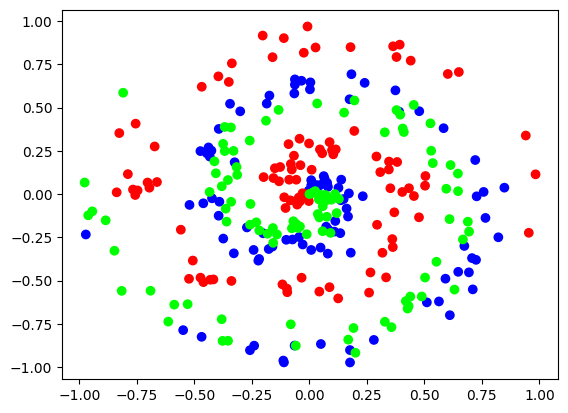

In [58]:
# Additional, we create Spiral Data for Datasets; Kindly check this repo ;)
from utilizers.utils_np import spiral_create_data

# here we create spiral_data with 100 samples and 3 classes
# adding color so we can determind the `classifications`
X, y = spiral_create_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

### Dense Layer Class

In [62]:
# Here, we can try for creating the Dense Layer

class Dense_Layer():
    # Here, we doing some random initialization for weights and biases
    def __init__(self, n_inputs, n_neurons):

        # Here initializing the weights as random
        # we putting (n_inputs, n_neurons) so we no need to transpose every time when forward pass
        self.weights = 1e-2 * np.random.randn(n_inputs, n_neurons)

        # we initialize the biases to be zero for most common initialization
        self.biases = np.zeros((1, n_neurons))

    # When we pass data through a model from beginning to end, this is called a forward pass.
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [63]:
# we set 2 feature inputs and 3 output values
dense_layer = Dense_Layer(2, 3)

# perform forward pass for training our data
dense_layer.forward(X)

print(dense_layer.output[:10])

[[0.000 0.000 0.000]
 [-0.000 -0.000 0.000]
 [-0.000 -0.000 0.000]
 [-0.000 -0.000 -0.000]
 [-0.000 -0.000 -0.000]
 [-0.001 -0.000 0.000]
 [-0.000 -0.000 -0.000]
 [-0.000 -0.000 -0.000]
 [-0.001 -0.000 0.000]
 [-0.000 0.000 -0.001]]


## Chapter 4: Activation Functions

**Key Points**:
- The activation function is applied to the output of a neuron (or layer of neurons), which modifies outputs.
- We use activation functions because if the activation function itself is nonlinear, it allows for neural networks with usually two or more hidden layers to map nonlinear functions.
- In general, your neural network will have two types of activation functions. The first will be the activation function used in hidden layers, and the second will be used in the output layer.

**Types of Activations**:
- Linear Activation. Usually are used for regression; `where y=x`
- Sigmoid Activation. This function returns a value in the range of 0 for negative infinity, through 0.5 for the input of 0, and to 1 for positive infinity; where `y = 1 / (1 + e**-x)`
- Rectified Linear(ReLu) Activation. The most powerfull, mainly speed and efficiency; `where y=x, x > 0`

**Why use Activations?**
- How we can fit neural network(basically linear functions) to nonlinear function/equation
- For example: House Prices are will be nonlinear equation, depends on number of factors; imagine where y=sin(x)) 

### ReLU Activation Function

### Softmax Activation Function

## Chapter 5: Calculating Network Error with Loss

## Chapter 6: Introducing Optimization

## Chapter 7: Derivatives

## Chapter 8: Gradients, Partial Derivatives, and the Chain Rule

## Chapter 9: Backpropagation

## Chapter 10: Optimizers

## Chapter 11: Testing with Out-of-Sample Data

## Chapter 12: Validation Data

## Chapter 13: Training Dataset

## Chapter 14: L1 and L2 Regularization

## Chapter 15: Dropout

## Chapter 16: Binary Logistic Regression

## Chapter 17: Regression

## Chapter 18: Model Object

## Chapter 19: A Real Dataset

## Chapter 20: Model Evaluation

## Chapter 21: Saving and Loading Models and Their Parameter

## Chapter 22: Prediction / Inference